In [ ]:
# default_exp experiment.mining.ir.unsupervised.w2v

# Neural Unsupervised Approaches for SE Traceability [approach w2v]

> Just Paper. Full Experimentation. This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets. Consider to Copy the entire notebook for a new and separeted empirical evaluation. 
> Implementing mutual information analysis
> Author: @danaderp April 2020
> Author: @danielrc Nov 2020

This copy is for Cisco purposes. It was adapted to process private github data from cisco. 

In [ ]:
from ds4se.mining.ir import *

In [ ]:
from prg import prg

In [ ]:
import ds4se as ds

In [ ]:
import numpy as np

In [ ]:
#??
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os
from enum import Enum, unique, auto

In [ ]:
#export
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
#export
from scipy.spatial import distance
from scipy.stats import pearsonr

In [ ]:
#export
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Artifacts Similarity with BasicSequenceVectorization

We test diferent similarities based on [blog](https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html) and [blog2](https://www.kdnuggets.com/2019/01/comparison-text-distance-metrics.html)

# Experients Set-up

In [ ]:
path_data = '../dvc-ds4se/' #dataset path

In [ ]:

path_to_trained_model = path_data+'models/wv/bpe128k/[word2vec-Java-Py-SK-500-20E-128k-1594873397.267055].model'
#path_to_trained_model = path_data/'models/wv/bpe128k/[word2vec-Java-Py-Wiki-SK-500-20E-128k[15]-1595189771.501188].model'

In [ ]:
path_model_prefix = path_data+'models/bpe/sentencepiece/wiki_py_java_bpe_8k'

In [ ]:
#Experiment 1 with Libest Conv preprocessing
def libest_params():
        return {
        "vectorizationType": VectorizationType.word2vec,
        "linkType": LinkType.req2src,
        "system": 'libest',
        "path_to_trained_model": path_to_trained_model,
        "source_type": SoftwareArtifacts.REQ.value,
        "target_type": SoftwareArtifacts.TC.value,
        "system_path_config": {
            "system_path": path_data + 'se-benchmarking/traceability/cisco/libest_data/[libest-all-corpus-1596063103.098236].csv',
            "sep": '~',
            "names": ['ids','conv'],
            "prep": Preprocessing.conv
        },
        "saving_path": path_data + 'se-benchmarking/traceability',
        "names": ['Source','Target','Linked?'],
        "model_prefix":path_model_prefix, #For BPE Analysis
        "path_mappings": '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt',    
    }

In [ ]:
#Experiment 2 with Libest BPE preprocessing
def libest_params_bpe():
        return {
        "vectorizationType": VectorizationType.word2vec,
        "linkType": LinkType.req2src,
        "system": 'libest',
        "path_to_trained_model": path_to_trained_model,
        "source_type": 'req', #TODO Standardize the artifacts 
        "target_type": 'tc',
        #"path_mappings": 'cisco/libest_data/sacp-pr-mappings.csv',
        "system_path_config": {
            "system_path": path_data + 'se-benchmarking/traceability/cisco/libest_data/[libest-all-corpus-1596063103.098236].csv',
            "sep": '~',
            "names": ['ids','bpe128k'],
            "prep": Preprocessing.bpe
        },
        "saving_path": path_data + 'se-benchmarking/traceability',
        "names": ['Source','Target','Linked?'],
        "model_prefix":path_data + 'models/bpe/sentencepiece/wiki_py_java_bpe_8k' #For BPE Analysis    
    }

In [ ]:
#CISCO GitHub Parameters
def sacp_params():
    return {
        "vectorizationType": VectorizationType.word2vec,
        "linkType": LinkType.issue2src,
        "system": 'sacp-python-common',
        "path_to_trained_model": path_data + 'models/wv/conv/[word2vec-Py-Java-Wiki-SK-500-20E[0]-1592979270.711115].model',
        "source_type": 'pr', #TODO Standardize the artifacts 
        "target_type": 'py',
        "path_mappings": '/tf/data/cisco/sacp_data/sacp-pr-mappings.csv',
        "system_path_config": {
            "system_path": '/tf/data/cisco/sacp_data/[sacp-python-common-all-corpus-1596383717.992744].csv', #MUST have bpe8k <----
            "sep": '~',
            "names": ['ids','conv'],
            "prep": Preprocessing.conv
        },
        "saving_path":  path_data/'se-benchmarking/traceability/cisco/sacp',
        "names": ['Source','Target','Linked?']
    }

In [ ]:
path_to_trained_model = path_data + 'models/wv/bpe8k/[word2vec-Java-Py-Wiki-SK-500-20E-8k[12]-1594546477.788739].model'

In [ ]:
def sacp_params_bpe():
    return {
        "vectorizationType": VectorizationType.word2vec,
        "linkType": LinkType.issue2src,
        "system": 'sacp-python-common',
        "path_to_trained_model": path_to_trained_model,
        "source_type": 'pr', #TODO Standardize the artifacts 
        "target_type": 'py',
        "path_mappings": '/tf/data/cisco/sacp_data/sacp-pr-mappings.csv',
        "system_path_config": {
            "system_path": '/tf/data/cisco/sacp_data/[sacp-python-common-all-corpus-1596383717.992744].csv',
            "sep": '~',
            "names": ['ids','bpe8k'],
            "prep": Preprocessing.bpe
        },
        "saving_path": path_data + 'se-benchmarking/traceability/cisco/sacp',
        "names": ['Source','Target','Linked?'],
        "model_prefix":path_data + 'models/bpe/sentencepiece/wiki_py_java_bpe_8k' #For BPE Analysis
    }

In [ ]:
#parameters = default_params()
parameters = libest_params()
#parameters = _params()
#parameters = sacp_params_bpe()
#parameters = libest_params_bpe()
parameters

{'vectorizationType': <VectorizationType.word2vec: 1>,
 'linkType': <LinkType.req2src: 2>,
 'system': 'libest',
 'path_to_trained_model': '../dvc-ds4se/models/wv/bpe128k/[word2vec-Java-Py-SK-500-20E-128k-1594873397.267055].model',
 'source_type': 'req',
 'target_type': 'tc',
 'system_path_config': {'system_path': '../dvc-ds4se/se-benchmarking/traceability/cisco/libest_data/[libest-all-corpus-1596063103.098236].csv',
  'sep': '~',
  'names': ['ids', 'conv'],
  'prep': <Preprocessing.conv: 1>},
 'saving_path': '../dvc-ds4se/se-benchmarking/traceability',
 'names': ['Source', 'Target', 'Linked?'],
 'model_prefix': '../dvc-ds4se/models/bpe/sentencepiece/wiki_py_java_bpe_8k',
 'path_mappings': '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt'}

# Artifacts Similarity with Word2Vec

In [ ]:
#[step 1]Creating the Vectorization Class
word2vec = ds.mining.ir.Word2VecSeqVect( params = parameters )

2020-12-16 02:24:17,829 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:24:17,886 : INFO : built Dictionary(6957 unique tokens: ['");', '"../../', '("\\', '();', ')))']...) from 87 documents (total 88944 corpus positions)
2020-12-16 02:24:17,888 : INFO : conventional preprocessing documents, dictionary, and vocab for the test corpus
2020-12-16 02:24:17,889 : INFO : loading Word2Vec object from ../dvc-ds4se/models/wv/bpe128k/[word2vec-Java-Py-SK-500-20E-128k-1594873397.267055].model
2020-12-16 02:24:17,958 : INFO : loading wv recursively from ../dvc-ds4se/models/wv/bpe128k/[word2vec-Java-Py-SK-500-20E-128k-1594873397.267055].model.wv.* with mmap=None
2020-12-16 02:24:17,960 : INFO : loading vectors from ../dvc-ds4se/models/wv/bpe128k/[word2vec-Java-Py-SK-500-20E-128k-1594873397.267055].model.wv.vectors.npy with mmap=None
2020-12-16 02:24:17,986 : INFO : setting ignored attribute vectors_norm to None
2020-12-16 02:24:17,988 : INFO : loading vocabulary recursi

In [ ]:
#[step 2]NonGroundTruth Computation
metric_list = [DistanceMetric.WMD,DistanceMetric.SCM,EntropyMetric.MSI_I,EntropyMetric.MI]
#metric_list = [EntropyMetric.MSI_I,EntropyMetric.MI]
word2vec.ComputeDistanceArtifacts( sampling=True, samples = 100, metric_list = metric_list )
word2vec.df_nonground_link.head()

2020-12-16 02:25:45,242 : INFO : Removed 60 and 1468 OOV words from document 1 and 2 (respectively).
2020-12-16 02:25:45,243 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:25:45,245 : INFO : built Dictionary(192 unique tokens: ['add', 'address', 'arc', 'attribut', 'author']...) from 2 documents (total 1459 corpus positions)
2020-12-16 02:25:45,471 : INFO : token count processed
2020-12-16 02:25:45,477 : INFO : frequencies processed
2020-12-16 02:25:46,095 : INFO : scalar_distribution processed
2020-12-16 02:25:46,096 : INFO : entropies processed
2020-12-16 02:25:46,097 : INFO : extropies processed
2020-12-16 02:25:46,100 : INFO : token count processed
2020-12-16 02:25:46,101 : INFO : alphabet_source #6957
2020-12-16 02:25:46,102 : INFO : alphabet_target #6957
2020-12-16 02:25:46,103 : INFO : vocab #6957
2020-12-16 02:25:46,105 : INFO : diff #set()
2020-12-16 02:25:47,354 : INFO : alphabet #6957
2020-12-16 02:25:47,974 : INFO : Computed distances or similar

2020-12-16 02:26:02,000 : INFO : token count processed
2020-12-16 02:26:02,002 : INFO : alphabet_source #6957
2020-12-16 02:26:02,003 : INFO : alphabet_target #6957
2020-12-16 02:26:02,004 : INFO : vocab #6957
2020-12-16 02:26:02,006 : INFO : diff #set()
2020-12-16 02:26:03,257 : INFO : alphabet #6957
2020-12-16 02:26:03,882 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ6.txt', 'test_data/LibEST_semeru_format/test/us1060.c')[[1.108496871070142, 0.4742715124317269], [0.8058314025402069, 0.1941686], [2.939884429263502, 1.3213548427323423], [7.625029353358799, 4.1011854841616815]]
2020-12-16 02:26:03,885 : INFO : Removed 19 and 664 OOV words from document 1 and 2 (respectively).
2020-12-16 02:26:03,886 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:26:03,888 : INFO : built Dictionary(146 unique tokens: ['base', 'connect', 'correspond', 'cover', 'data']...) from 2 documents (total 416 corpus positions)
2020-12-16 0

2020-12-16 02:26:20,186 : INFO : Removed 13 and 1349 OOV words from document 1 and 2 (respectively).
2020-12-16 02:26:20,187 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:26:20,190 : INFO : built Dictionary(138 unique tokens: ['access', 'afford', 'defin', 'est', 'full']...) from 2 documents (total 1282 corpus positions)
2020-12-16 02:26:20,239 : INFO : token count processed
2020-12-16 02:26:20,245 : INFO : frequencies processed
2020-12-16 02:26:20,876 : INFO : scalar_distribution processed
2020-12-16 02:26:20,877 : INFO : entropies processed
2020-12-16 02:26:20,880 : INFO : extropies processed
2020-12-16 02:26:20,883 : INFO : token count processed
2020-12-16 02:26:20,885 : INFO : alphabet_source #6957
2020-12-16 02:26:20,886 : INFO : alphabet_target #6957
2020-12-16 02:26:20,887 : INFO : vocab #6957
2020-12-16 02:26:20,889 : INFO : diff #set()
2020-12-16 02:26:22,172 : INFO : alphabet #6957
2020-12-16 02:26:22,808 : INFO : Computed distances or similariti

2020-12-16 02:26:36,961 : INFO : token count processed
2020-12-16 02:26:36,962 : INFO : alphabet_source #6957
2020-12-16 02:26:36,963 : INFO : alphabet_target #6957
2020-12-16 02:26:36,964 : INFO : vocab #6957
2020-12-16 02:26:36,966 : INFO : diff #set()
2020-12-16 02:26:38,223 : INFO : alphabet #6957
2020-12-16 02:26:38,844 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ14.txt', 'test_data/LibEST_semeru_format/test/us903.c')[[1.1013643084569777, 0.4758813100496104], [0.7730646878480911, 0.22693531], [4.005836087367967, 1.3705076892564731], [8.75622759695926, 5.937295746858414]]
2020-12-16 02:26:38,847 : INFO : Removed 27 and 664 OOV words from document 1 and 2 (respectively).
2020-12-16 02:26:38,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:26:38,850 : INFO : built Dictionary(137 unique tokens: ['accord', 'advis', 'allow', 'attribut', 'author']...) from 2 documents (total 411 corpus positions)
2020-12-16 0

2020-12-16 02:26:55,248 : INFO : Removed 30 and 664 OOV words from document 1 and 2 (respectively).
2020-12-16 02:26:55,249 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:26:55,250 : INFO : built Dictionary(136 unique tokens: ['author', 'band', 'base', 'client', 'est']...) from 2 documents (total 409 corpus positions)
2020-12-16 02:26:55,307 : INFO : token count processed
2020-12-16 02:26:55,320 : INFO : frequencies processed
2020-12-16 02:26:55,950 : INFO : scalar_distribution processed
2020-12-16 02:26:55,951 : INFO : entropies processed
2020-12-16 02:26:55,952 : INFO : extropies processed
2020-12-16 02:26:55,954 : INFO : token count processed
2020-12-16 02:26:55,955 : INFO : alphabet_source #6957
2020-12-16 02:26:55,957 : INFO : alphabet_target #6957
2020-12-16 02:26:55,957 : INFO : vocab #6957
2020-12-16 02:26:55,959 : INFO : diff #set()
2020-12-16 02:26:57,238 : INFO : alphabet #6957
2020-12-16 02:26:57,859 : INFO : Computed distances or similarities 

2020-12-16 02:27:12,327 : INFO : token count processed
2020-12-16 02:27:12,329 : INFO : alphabet_source #6957
2020-12-16 02:27:12,330 : INFO : alphabet_target #6957
2020-12-16 02:27:12,331 : INFO : vocab #6957
2020-12-16 02:27:12,332 : INFO : diff #set()
2020-12-16 02:27:13,590 : INFO : alphabet #6957
2020-12-16 02:27:14,318 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ32.txt', 'test_data/LibEST_semeru_format/test/us1864.c')[[1.0570176580637678, 0.4861406979565169], [0.723444014787674, 0.276556], [4.111698692943856, 1.390201917474914], [8.739508040451842, 5.897158532459386]]
2020-12-16 02:27:14,321 : INFO : Removed 59 and 577 OOV words from document 1 and 2 (respectively).
2020-12-16 02:27:14,322 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:27:14,323 : INFO : built Dictionary(152 unique tokens: ['anchor', 'author', 'avail', 'behind', 'browser']...) from 2 documents (total 650 corpus positions)
2020-12-16 02:

2020-12-16 02:27:30,277 : INFO : Removed 138 and 1468 OOV words from document 1 and 2 (respectively).
2020-12-16 02:27:30,278 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:27:30,281 : INFO : built Dictionary(196 unique tokens: ['132', 'access', 'address', 'attr', 'attribut']...) from 2 documents (total 1574 corpus positions)
2020-12-16 02:27:30,546 : INFO : token count processed
2020-12-16 02:27:30,556 : INFO : frequencies processed
2020-12-16 02:27:31,172 : INFO : scalar_distribution processed
2020-12-16 02:27:31,173 : INFO : entropies processed
2020-12-16 02:27:31,173 : INFO : extropies processed
2020-12-16 02:27:31,176 : INFO : token count processed
2020-12-16 02:27:31,178 : INFO : alphabet_source #6957
2020-12-16 02:27:31,179 : INFO : alphabet_target #6957
2020-12-16 02:27:31,180 : INFO : vocab #6957
2020-12-16 02:27:31,181 : INFO : diff #set()
2020-12-16 02:27:32,440 : INFO : alphabet #6957
2020-12-16 02:27:33,061 : INFO : Computed distances or simil

2020-12-16 02:27:47,040 : INFO : extropies processed
2020-12-16 02:27:47,042 : INFO : token count processed
2020-12-16 02:27:47,044 : INFO : alphabet_source #6957
2020-12-16 02:27:47,045 : INFO : alphabet_target #6957
2020-12-16 02:27:47,046 : INFO : vocab #6957
2020-12-16 02:27:47,047 : INFO : diff #set()
2020-12-16 02:27:48,302 : INFO : alphabet #6957
2020-12-16 02:27:48,922 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ23.txt', 'test_data/LibEST_semeru_format/test/us3496.c')[[1.150531849841959, 0.4650012507712868], [0.8678732961416245, 0.1321267], [2.972253928364927, 1.311764078962958], [7.444103259461646, 5.177130113905775]]
2020-12-16 02:27:48,925 : INFO : Removed 47 and 2029 OOV words from document 1 and 2 (respectively).
2020-12-16 02:27:48,926 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:27:48,929 : INFO : built Dictionary(190 unique tokens: ['altern', 'author', 'base', 'cbc', 'check']...) from 2 docu

2020-12-16 02:28:05,005 : INFO : Removed 59 and 2062 OOV words from document 1 and 2 (respectively).
2020-12-16 02:28:05,006 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:28:05,008 : INFO : built Dictionary(159 unique tokens: ['anchor', 'author', 'avail', 'behind', 'browser']...) from 2 documents (total 746 corpus positions)
2020-12-16 02:28:05,167 : INFO : token count processed
2020-12-16 02:28:05,173 : INFO : frequencies processed
2020-12-16 02:28:05,802 : INFO : scalar_distribution processed
2020-12-16 02:28:05,803 : INFO : entropies processed
2020-12-16 02:28:05,804 : INFO : extropies processed
2020-12-16 02:28:05,807 : INFO : token count processed
2020-12-16 02:28:05,808 : INFO : alphabet_source #6957
2020-12-16 02:28:05,809 : INFO : alphabet_target #6957
2020-12-16 02:28:05,810 : INFO : vocab #6957
2020-12-16 02:28:05,812 : INFO : diff #set()
2020-12-16 02:28:07,060 : INFO : alphabet #6957
2020-12-16 02:28:07,679 : INFO : Computed distances or simil

2020-12-16 02:28:22,012 : INFO : token count processed
2020-12-16 02:28:22,015 : INFO : alphabet_source #6957
2020-12-16 02:28:22,017 : INFO : alphabet_target #6957
2020-12-16 02:28:22,018 : INFO : vocab #6957
2020-12-16 02:28:22,020 : INFO : diff #set()
2020-12-16 02:28:23,270 : INFO : alphabet #6957
2020-12-16 02:28:23,889 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ14.txt', 'test_data/LibEST_semeru_format/test/us899.c')[[1.0634199184552562, 0.4846323286190979], [0.7152673006057739, 0.2847327], [4.101681489107106, 1.3817417127226523], [8.271135450796873, 5.953870679314438]]
2020-12-16 02:28:23,893 : INFO : Removed 33 and 1630 OOV words from document 1 and 2 (respectively).
2020-12-16 02:28:23,893 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:28:23,895 : INFO : built Dictionary(193 unique tokens: ['accept', 'access', 'act', 'author', 'avail']...) from 2 documents (total 891 corpus positions)
2020-12-16 02:2

2020-12-16 02:28:40,301 : INFO : Removed 145 and 1444 OOV words from document 1 and 2 (respectively).
2020-12-16 02:28:40,301 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:28:40,303 : INFO : built Dictionary(205 unique tokens: ['802', 'also', 'anchor', 'aspect', 'attribut']...) from 2 documents (total 1325 corpus positions)
2020-12-16 02:28:40,606 : INFO : token count processed
2020-12-16 02:28:40,616 : INFO : frequencies processed
2020-12-16 02:28:41,237 : INFO : scalar_distribution processed
2020-12-16 02:28:41,238 : INFO : entropies processed
2020-12-16 02:28:41,238 : INFO : extropies processed
2020-12-16 02:28:41,244 : INFO : token count processed
2020-12-16 02:28:41,246 : INFO : alphabet_source #6957
2020-12-16 02:28:41,248 : INFO : alphabet_target #6957
2020-12-16 02:28:41,249 : INFO : vocab #6957
2020-12-16 02:28:41,252 : INFO : diff #set()
2020-12-16 02:28:42,516 : INFO : alphabet #6957
2020-12-16 02:28:43,135 : INFO : Computed distances or simila

2020-12-16 02:28:57,518 : INFO : extropies processed
2020-12-16 02:28:57,523 : INFO : token count processed
2020-12-16 02:28:57,525 : INFO : alphabet_source #6957
2020-12-16 02:28:57,528 : INFO : alphabet_target #6957
2020-12-16 02:28:57,529 : INFO : vocab #6957
2020-12-16 02:28:57,530 : INFO : diff #set()
2020-12-16 02:28:58,780 : INFO : alphabet #6957
2020-12-16 02:28:59,424 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ49.txt', 'test_data/LibEST_semeru_format/test/us748.c')[[1.0330329954968793, 0.491875932272116], [0.7348989546298981, 0.26510105], [4.739485167910035, 1.406924120604358], [8.83056177220314, 6.325418002026327]]
2020-12-16 02:28:59,428 : INFO : Removed 19 and 1194 OOV words from document 1 and 2 (respectively).
2020-12-16 02:28:59,428 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:28:59,430 : INFO : built Dictionary(168 unique tokens: ['base', 'connect', 'correspond', 'cover', 'data']...) from 2

2020-12-16 02:29:15,800 : INFO : Removed 19 and 1630 OOV words from document 1 and 2 (respectively).
2020-12-16 02:29:15,801 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:29:15,802 : INFO : built Dictionary(185 unique tokens: ['base', 'connect', 'correspond', 'cover', 'data']...) from 2 documents (total 869 corpus positions)
2020-12-16 02:29:15,922 : INFO : token count processed
2020-12-16 02:29:15,928 : INFO : frequencies processed
2020-12-16 02:29:16,548 : INFO : scalar_distribution processed
2020-12-16 02:29:16,549 : INFO : entropies processed
2020-12-16 02:29:16,550 : INFO : extropies processed
2020-12-16 02:29:16,555 : INFO : token count processed
2020-12-16 02:29:16,557 : INFO : alphabet_source #6957
2020-12-16 02:29:16,560 : INFO : alphabet_target #6957
2020-12-16 02:29:16,561 : INFO : vocab #6957
2020-12-16 02:29:16,562 : INFO : diff #set()
2020-12-16 02:29:17,822 : INFO : alphabet #6957
2020-12-16 02:29:18,447 : INFO : Computed distances or simil

2020-12-16 02:29:32,488 : INFO : token count processed
2020-12-16 02:29:32,489 : INFO : alphabet_source #6957
2020-12-16 02:29:32,490 : INFO : alphabet_target #6957
2020-12-16 02:29:32,491 : INFO : vocab #6957
2020-12-16 02:29:32,493 : INFO : diff #set()
2020-12-16 02:29:33,749 : INFO : alphabet #6957
2020-12-16 02:29:34,376 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ57.txt', 'test_data/LibEST_semeru_format/test/us3612.c')[[1.0771117270418926, 0.481437751749707], [0.8207048326730728, 0.17929517], [4.003103797225431, 1.3871060048624124], [8.352713831612732, 7.141824602044302]]
2020-12-16 02:29:34,379 : INFO : Removed 27 and 1921 OOV words from document 1 and 2 (respectively).
2020-12-16 02:29:34,380 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:29:34,382 : INFO : built Dictionary(117 unique tokens: ['accord', 'advis', 'allow', 'attribut', 'author']...) from 2 documents (total 556 corpus positions)
2020-12-16

2020-12-16 02:29:50,132 : INFO : Removed 32 and 1161 OOV words from document 1 and 2 (respectively).
2020-12-16 02:29:50,133 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:29:50,135 : INFO : built Dictionary(147 unique tokens: ['accept', 'access', 'also', 'altern', 'author']...) from 2 documents (total 1019 corpus positions)
2020-12-16 02:29:50,260 : INFO : token count processed
2020-12-16 02:29:50,266 : INFO : frequencies processed
2020-12-16 02:29:50,888 : INFO : scalar_distribution processed
2020-12-16 02:29:50,889 : INFO : entropies processed
2020-12-16 02:29:50,890 : INFO : extropies processed
2020-12-16 02:29:50,893 : INFO : token count processed
2020-12-16 02:29:50,894 : INFO : alphabet_source #6957
2020-12-16 02:29:50,895 : INFO : alphabet_target #6957
2020-12-16 02:29:50,896 : INFO : vocab #6957
2020-12-16 02:29:50,898 : INFO : diff #set()
2020-12-16 02:29:52,147 : INFO : alphabet #6957
2020-12-16 02:29:52,772 : INFO : Computed distances or simila

2020-12-16 02:30:07,328 : INFO : token count processed
2020-12-16 02:30:07,329 : INFO : alphabet_source #6957
2020-12-16 02:30:07,331 : INFO : alphabet_target #6957
2020-12-16 02:30:07,331 : INFO : vocab #6957
2020-12-16 02:30:07,333 : INFO : diff #set()
2020-12-16 02:30:08,584 : INFO : alphabet #6957
2020-12-16 02:30:09,210 : INFO : Computed distances or similarities ('test_data/LibEST_semeru_format/requirements/RQ20.txt', 'test_data/LibEST_semeru_format/test/us900.c')[[1.1447020552638465, 0.46626523136192805], [0.9458929188549519, 0.05410708], [3.272812967681858, 1.3375600856964762], [7.2755988615781275, 5.3029932265755635]]
2020-12-16 02:30:09,213 : INFO : Removed 31 and 939 OOV words from document 1 and 2 (respectively).
2020-12-16 02:30:09,214 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-12-16 02:30:09,216 : INFO : built Dictionary(149 unique tokens: ['author', 'base', 'cbc', 'check', 'client']...) from 2 documents (total 718 corpus positions)
2020-12-16 02:

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us894.c,1.055692,0.486454,0.803410,0.196590,4.685972,1.410394,7.920854,6.158280
1,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us898.c,1.115621,0.472674,0.799947,0.200053,3.653757,1.376497,7.226829,4.598405
2,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.182004,0.458294,0.953313,0.046687,2.873141,1.329330,7.190003,4.580062
3,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.079827,0.480809,0.947533,0.052467,4.367133,1.395704,7.502431,5.776133
4,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us3496.c,1.050227,0.487751,0.791415,0.208585,3.520787,1.357829,7.457979,5.326814


In [ ]:
word2vec.df_nonground_link.head()

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us894.c,1.055692,0.486454,0.803410,0.196590,4.685972,1.410394,7.920854,6.158280
1,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us898.c,1.115621,0.472674,0.799947,0.200053,3.653757,1.376497,7.226829,4.598405
2,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.182004,0.458294,0.953313,0.046687,2.873141,1.329330,7.190003,4.580062
3,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.079827,0.480809,0.947533,0.052467,4.367133,1.395704,7.502431,5.776133
4,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us3496.c,1.050227,0.487751,0.791415,0.208585,3.520787,1.357829,7.457979,5.326814


In [ ]:
#[step 3]Saving Non-GroundTruth Links
word2vec.SaveLinks()

2020-12-16 02:30:30,466 : INFO : Saving in...../dvc-ds4se/se-benchmarking/traceability[libest-VectorizationType.word2vec-LinkType.req2src-False-1608085830.45751].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_nonglinks = ds.mining.ir.LoadLinks(timestamp=1608085830.45751, params=parameters)
df_nonglinks.head()

2020-12-16 02:31:43,782 : INFO : Loading computed links from... ../dvc-ds4se/se-benchmarking/traceability[libest-VectorizationType.word2vec-LinkType.req2src-False-1608085830.45751].csv


,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us894.c,1.055692,0.486454,0.803410,0.196590,4.685972,1.410394,7.920854,6.158280
1,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us898.c,1.115621,0.472674,0.799947,0.200053,3.653757,1.376497,7.226829,4.598405
2,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.182004,0.458294,0.953313,0.046687,2.873141,1.329330,7.190003,4.580062
3,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.079827,0.480809,0.947533,0.052467,4.367133,1.395704,7.502431,5.776133
4,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us3496.c,1.050227,0.487751,0.791415,0.208585,3.520787,1.357829,7.457979,5.326814


In [ ]:
#[step 4]GroundTruthMatching Testing
#TODO change the path for a param
path_to_ground_truth = '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt'
word2vec.MatchWithGroundTruth(path_to_ground_truth, semeru_format=True)
word2vec.df_ground_link

2020-12-16 02:32:12,562 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,566 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,570 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,574 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,578 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,582 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,585 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,587 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,590 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,593 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,595 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,598 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,600 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,602 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,605 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,607 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,610 

2020-12-16 02:32:12,895 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,898 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,900 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,902 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,904 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,907 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,909 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,911 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,913 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,915 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,917 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,919 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,921 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,924 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,926 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,928 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:12,930 

2020-12-16 02:32:13,217 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,219 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,222 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,224 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,226 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,229 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,231 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,233 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,236 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,238 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,240 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,243 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,245 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,248 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,250 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,253 : INFO : findDistInDF: semeru_format
2020-12-16 02:32:13,255 

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI,Linked?
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us894.c,1.055692,0.486454,0.803410,0.196590,4.685972,1.410394,7.920854,6.158280,0.0
1,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us898.c,1.115621,0.472674,0.799947,0.200053,3.653757,1.376497,7.226829,4.598405,0.0
2,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.182004,0.458294,0.953313,0.046687,2.873141,1.329330,7.190003,4.580062,0.0
3,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.079827,0.480809,0.947533,0.052467,4.367133,1.395704,7.502431,5.776133,0.0
4,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us3496.c,1.050227,0.487751,0.791415,0.208585,3.520787,1.357829,7.457979,5.326814,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us1864.c,0.956124,0.511215,0.688852,0.311148,4.401750,1.392002,8.618406,5.614617,1.0
96,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us748.c,1.033817,0.491686,0.792230,0.207770,4.682616,1.405861,8.772834,6.053077,0.0
97,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.144702,0.466265,0.945893,0.054107,3.272813,1.337560,7.275599,5.302993,1.0
98,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us1060.c,1.021799,0.494609,0.795305,0.204695,4.068451,1.389074,7.686388,5.187485,0.0


In [ ]:
#[step 4.1]GroundTruthMatching Testing For CISCO Mappings
word2vec.MatchWithGroundTruth(from_mappings=True)
word2vec.df_ground_link

In [ ]:
#[optional]GroundTruth Direct Processing
ground_links = word2vec.ground_truth_processing(path_to_ground_truth)
ground_links[141] # A tuple

('RQ33.txt', 'us894.c')

In [ ]:
#[step 5]Saving GroundTruth Links
word2vec.SaveLinks(grtruth = True)

2020-12-16 02:32:42,445 : INFO : Saving in...../dvc-ds4se/se-benchmarking/traceability[libest-VectorizationType.word2vec-LinkType.req2src-True-1608085962.438394].csv


In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_glinks = ds.mining.ir.LoadLinks(timestamp=1608085962.438394, params=parameters,grtruth = True)
df_glinks.head()

2020-12-16 02:32:58,325 : INFO : Loading computed links from... ../dvc-ds4se/se-benchmarking/traceability[libest-VectorizationType.word2vec-LinkType.req2src-True-1608085962.438394].csv


,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI,Linked?
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us894.c,1.055692,0.486454,0.803410,0.196590,4.685972,1.410394,7.920854,6.158280,0.0
1,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us898.c,1.115621,0.472674,0.799947,0.200053,3.653757,1.376497,7.226829,4.598405,0.0
2,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.182004,0.458294,0.953313,0.046687,2.873141,1.329330,7.190003,4.580062,0.0
3,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us900.c,1.079827,0.480809,0.947533,0.052467,4.367133,1.395704,7.502431,5.776133,0.0
4,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us3496.c,1.050227,0.487751,0.791415,0.208585,3.520787,1.357829,7.457979,5.326814,1.0


# Software Traceability with Artifacts Representation 
We are employing two techniques for analyzing software artifacts without groundtruth:
- Prototypes and Criticisms for Paragraph Vectors 
- Information Theory for Software Traceability (Shared Information and Mutual Information)

# Approach Evaluation and Interpretation (word2vec)
Classification/evaluation metrics for highly imbalanced data [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).

In [ ]:
#export
class VectorEvaluation():
    '''Approaches Common Evaluations and Interpretations (statistical analysis)'''
    def __init__(self, sequenceVectorization):
        self.seqVect = sequenceVectorization

In [ ]:
%matplotlib inline

In [ ]:
#export
class SupervisedVectorEvaluation(VectorEvaluation):
    def __init__(self, sequenceVectorization, sim_list):
        super().__init__(sequenceVectorization)
        self.sim_list = sim_list
        
        self.df_filtered = sequenceVectorization.df_ground_link 
        self.df_filtered = self.df_filtered[~self.df_filtered.isin([np.nan, np.inf, -np.inf]).any(1)]
        
        #CreateFilters Here
        
        self.y_test = self.df_filtered['Linked?'].values
        self.y_score = [self.df_filtered[sim].values for sim in sim_list]
        self.title = str(sequenceVectorization.params['vectorizationType'])
        pass
    
    def Compute_precision_recall_gain(self):
        '''One might choose PRG if there is little interest in identifying false negatives '''
        for count,sim in enumerate(self.sim_list):
            prg_curve = prg.create_prg_curve(self.y_test, self.y_score[count])
            auprg = prg.calc_auprg(prg_curve)
            prg.plot_prg(prg_curve)
            logging.info('auprg:  %.3f' %  auprg)
            logging.info("compute_precision_recall_gain Complete: "+str(sim))
        pass
    
    def Compute_avg_precision(self):
        '''Generated precision-recall curve'''
        
        # calculate the no skill line as the proportion of the positive class
        no_skill = len(self.y_test[self.y_test==1]) / len(self.y_test)
        
        for count,sim in enumerate(self.sim_list):
            plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill') #reference curve
            precision, recall, _ = precision_recall_curve(self.y_test, self.y_score[count]) #compute precision-recall curve
            plt.plot(recall, precision, marker='.', label = str(sim)) #plot model curve
            plt.title(self.label[count])
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend() #show the legend
            plt.show() #show the plot

            average_precision = average_precision_score(self.y_test, self.y_score[count])
            auc_score = auc(recall, precision)
            logging.info('Average precision-recall score: {0:0.2f}'.format(average_precision))
            logging.info('Precision-Recall AUC: %.3f' % auc_score)
        pass
    
    def Compute_avg_precision_same_plot(self):
        '''Generated precision-recall curve'''

        # calculate the no skill line as the proportion of the positive class
        no_skill = len(self.y_test[self.y_test==1]) / len(self.y_test)
        plt.plot([0, 1], [no_skill, no_skill], linewidth=0.5, linestyle='--', label='No Skill [{0:0.2f}]'.format(no_skill)) #reference curve
        
        for count,sim in enumerate(self.sim_list):
            precision, recall, _ = precision_recall_curve(self.y_test, self.y_score[count]) #compute precision-recall curve
            average_precision = average_precision_score(self.y_test, self.y_score[count])
            auc_score = auc(recall, precision)
            logging.info('Average precision-recall score: {0:0.2f}'.format(average_precision))
            logging.info('Precision-Recall AUC: %.2f' % auc_score)
            
            #plt.plot(recall, precision, linewidth=0.4, marker='.', label = str(sim)) #plot model curve
            plt.plot(recall, precision, linewidth=1, label = str(sim)+  ' [auc:{0:0.2f}]'.format(auc_score)) #plot model curve
            pass
        
        plt.title(self.title)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(fontsize=9) #show the legend
        plt.show() #show the plot
        pass
    
    def Compute_roc_curve(self):

        plt.plot([0, 1], [0, 1],  linewidth=0.5, linestyle='--', label='No Skill') #reference curve
        for count,sim in enumerate(self.sim_list):
            fpr, tpr, _ = roc_curve(self.y_test, self.y_score[count]) #compute roc curve
            roc_auc = roc_auc_score(self.y_test, self.y_score[count])
            logging.info('ROC AUC %.2f' % roc_auc)
            
            plt.plot(fpr, tpr,  linewidth=1, label = str(sim)+  ' [auc:{0:0.2f}]'.format(roc_auc)) #plot model curve
            pass
        plt.title(self.title)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(fontsize=9) #show the legend
        plt.show() #show the plot

        pass

In [ ]:
similarities = [SimilarityMetric.SCM_sim, SimilarityMetric.WMD_sim]
supevisedEval = SupervisedVectorEvaluation(word2vec, sim_list = similarities ) #<---- Parameter 
#supevisedEval = SupervisedVectorEvaluation(word2vec, similarity=SimilarityMetric.WMD_sim)

In [ ]:
supevisedEval.y_test

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [ ]:
supevisedEval.y_score

[array([0.19659016, 0.20005302, 0.04668691, 0.05246712, 0.20858522,
        0.36217874, 0.1941686 , 0.18971832, 0.28115162, 0.20318545,
        0.33125898, 0.32515696, 0.34129408, 0.11309636, 0.30349287,
        0.14549355, 0.25493443, 0.30086634, 0.27622476, 0.22693531,
        0.18041284, 0.18863231, 0.05053866, 0.08878815, 0.05672885,
        0.09778603, 0.27370843, 0.21646963, 0.20999528, 0.26476347,
        0.14380991, 0.30241361, 0.27655599, 0.24736232, 0.35562211,
        0.17684376, 0.3459942 , 0.28827238, 0.05590608, 0.21944875,
        0.14013498, 0.25589278, 0.05255499, 0.18930507, 0.05311311,
        0.1321267 , 0.36677653, 0.2117895 , 0.2163208 , 0.22533573,
        0.12799694, 0.10677199, 0.06608032, 0.0981639 , 0.207588  ,
        0.40718576, 0.23332663, 0.10410803, 0.2847327 , 0.3621296 ,
        0.0848619 , 0.14226338, 0.22423534, 0.08434042, 0.19974852,
        0.32929134, 0.19881485, 0.30846602, 0.27503189, 0.1747272 ,
        0.3253257 , 0.26510105, 0.26046887, 0.33

## Confusion Matrix

In [ ]:
##TODO Move the confusion matrix to SupervisedVectorEvaluation
y_score_threshold = [0 if elem<=0.8 else 1 for elem in supevisedEval.y_score] #Hardcoded 0.7 Threshold

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#TODO a Variation threshold analysis
tn, fp, fn, tp = confusion_matrix(supevisedEval.y_test, y_score_threshold).ravel()

NameError: name 'y_score_threshold' is not defined

In [ ]:
(tn, fp, fn, tp)

NameError: name 'tn' is not defined

## Precision-Racall-Gain
Based on the library here: [link](https://github.com/meeliskull/prg/tree/master/Python_package). 
The area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection [(Flach & Kull, 2015)](http://people.cs.bris.ac.uk/~flach//PRGcurves/).
One might choose PRG if there is little interest in identifying false negatives [(from Blog)](https://medium.com/@alexabate/i-did-something-boring-so-you-dont-have-to-9140ca46c84d).

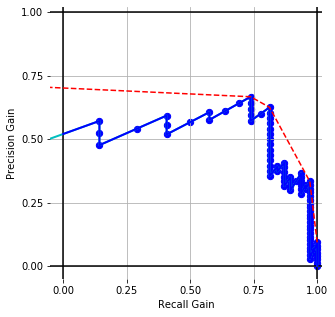

2020-12-16 02:39:47,574 : INFO : auprg:  0.516
2020-12-16 02:39:47,575 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.SCM_sim


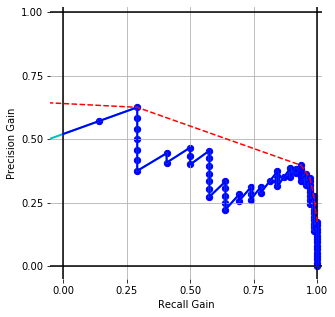

2020-12-16 02:39:47,708 : INFO : auprg:  0.417
2020-12-16 02:39:47,709 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.WMD_sim


In [ ]:
supevisedEval.Compute_precision_recall_gain()

## Compute the average precision score¶
Precision is a metric that quantifies the number of correct positive predictions made.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

2020-12-16 02:40:54,853 : INFO : Average precision-recall score: 0.42
2020-12-16 02:40:54,854 : INFO : Precision-Recall AUC: 0.39
2020-12-16 02:40:54,860 : INFO : Average precision-recall score: 0.39
2020-12-16 02:40:54,862 : INFO : Precision-Recall AUC: 0.38


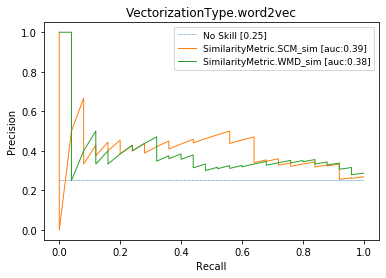

In [ ]:
supevisedEval.Compute_avg_precision_same_plot()

## Compute ROC Curve
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class [(see Blog)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve [link](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba).

2020-12-16 02:41:50,361 : INFO : ROC AUC 0.70
2020-12-16 02:41:50,366 : INFO : ROC AUC 0.67


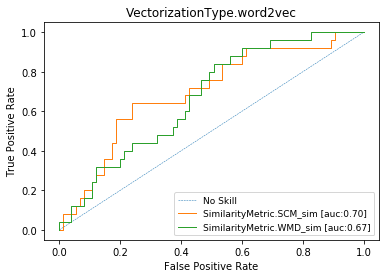

In [ ]:
supevisedEval.Compute_roc_curve()

## EDA: Compute distribution of similarities word2vec

In [ ]:
#Basic Statistics
filter_metrics = supevisedEval.df_filtered #word2vec.df_ground_link
filter_metrics.describe()

,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.JI,EntropyMetric.MI,Linked?
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.068228,0.483925,0.788997,0.211003,3.779417,1.364867,7.940609,5.363957,0.250000
std,0.061179,0.014321,0.095961,0.095961,0.629594,0.034985,0.688473,0.850005,0.435194
min,0.941713,0.451898,0.592814,0.042877,2.235926,1.265333,6.817356,3.358113,0.000000
25%,1.030430,0.473390,0.717953,0.141731,3.279034,1.343257,7.390807,4.783917,0.000000
50%,1.063599,0.484590,0.791823,0.208177,3.786392,1.374555,7.712602,5.359445,0.000000
75%,1.112422,0.492506,0.858269,0.282047,4.298768,1.390257,8.419137,5.941439,0.250000
max,1.212890,0.515009,0.957123,0.407186,4.997755,1.414710,9.503464,8.249274,1.000000


In [ ]:
filter_metrics.shape

(100, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47fc82c160>,
      dtype=object)

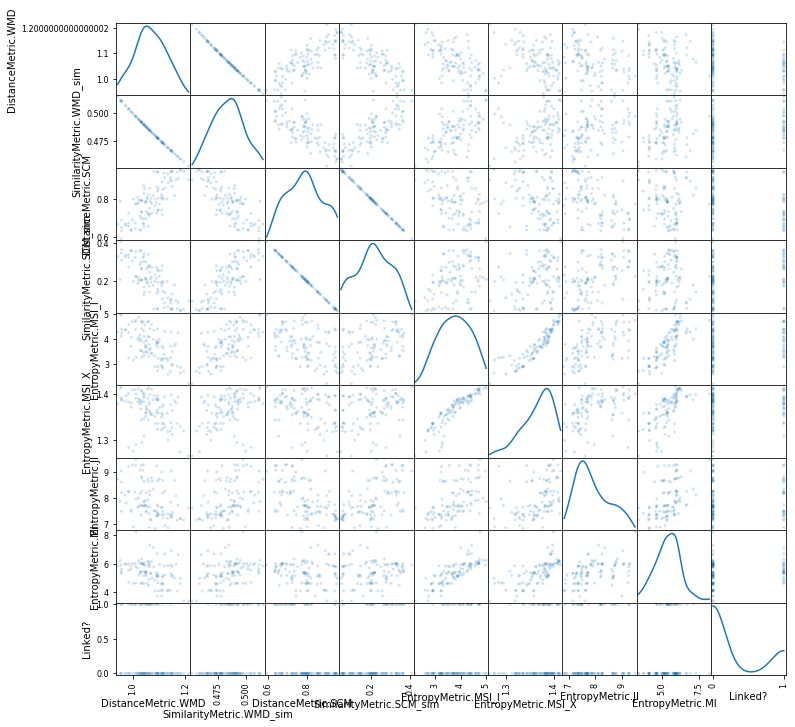

In [ ]:
scatter_matrix(filter_metrics, alpha=0.2, figsize=(12, 12), diagonal='kde')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

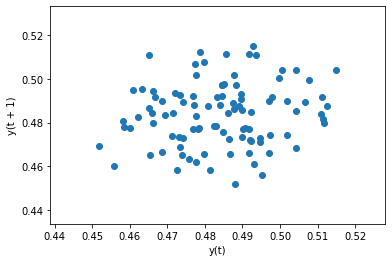

In [ ]:
lag_plot(filter_metrics[[SimilarityMetric.WMD_sim]])

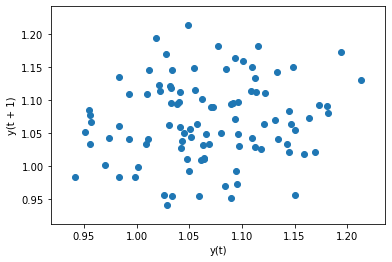

In [ ]:
lag_plot(filter_metrics[DistanceMetric.WMD])

In [ ]:
# calculate model precision-recall curve
sim = np.array(filter_metrics[SimilarityMetric.SCM_sim]) #SimilarityMetric.SCM_sim #SimilarityMetric.WMD_sim

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ef8298d0>,
      dtype=object)

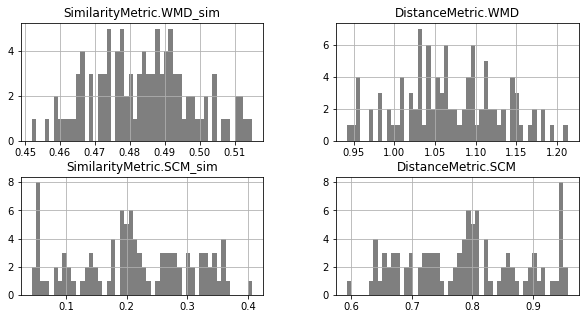

In [ ]:
filter_metrics.hist(column=[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM],color='k',bins=50,figsize=[10,5],alpha=0.5)

SimilarityMetric.WMD_sim    0.014321
DistanceMetric.WMD          0.061179
SimilarityMetric.SCM_sim    0.095961
DistanceMetric.SCM          0.095961
dtype: float64


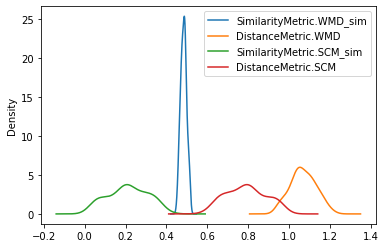

In [ ]:
errors = filter_metrics[[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM]].std()
print(errors)
filter_metrics[[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM]].plot.kde()

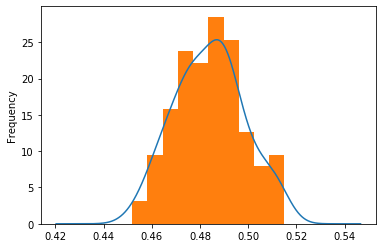

In [ ]:
filter_metrics[SimilarityMetric.WMD_sim].plot.kde()
filter_metrics[SimilarityMetric.WMD_sim].plot.hist(density=True) # Histogram will now be normalized

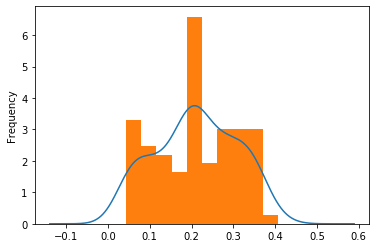

In [ ]:
filter_metrics[SimilarityMetric.SCM_sim].plot.kde()
filter_metrics[SimilarityMetric.SCM_sim].plot.hist(density=True) # Histogram will now be normalized

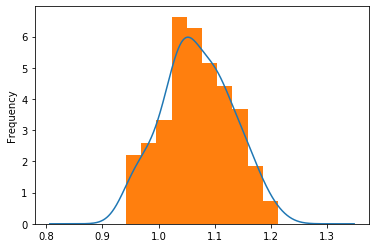

In [ ]:
filter_metrics[DistanceMetric.WMD].plot.kde()
filter_metrics[DistanceMetric.WMD].plot.hist(density=True)

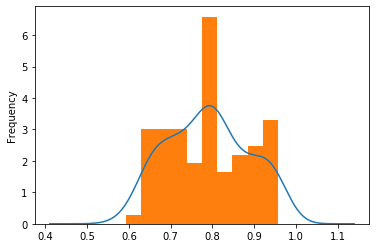

In [ ]:
filter_metrics[DistanceMetric.SCM].plot.kde()
filter_metrics[DistanceMetric.SCM].plot.hist(density=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ee0c2eb8>,
      dtype=object)

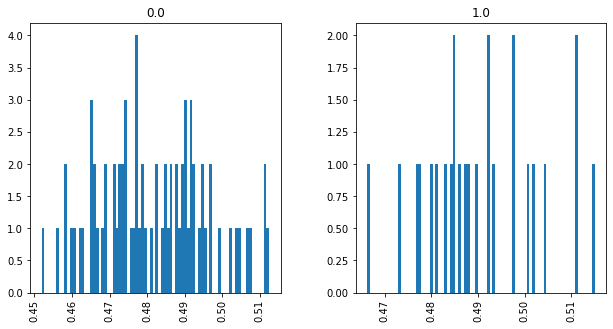

In [ ]:
filter_metrics.hist(by='Linked?',column=SimilarityMetric.WMD_sim ,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ede7d198>,
      dtype=object)

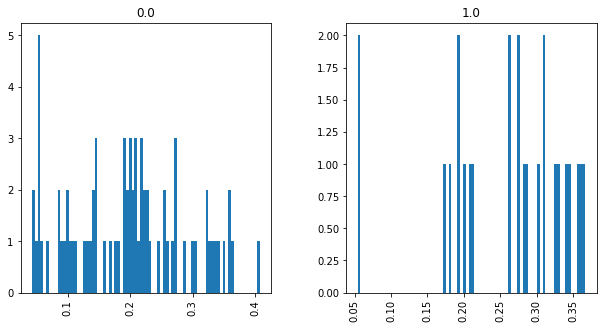

In [ ]:
filter_metrics.hist(by='Linked?',column=SimilarityMetric.SCM_sim ,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ede23940>,
      dtype=object)

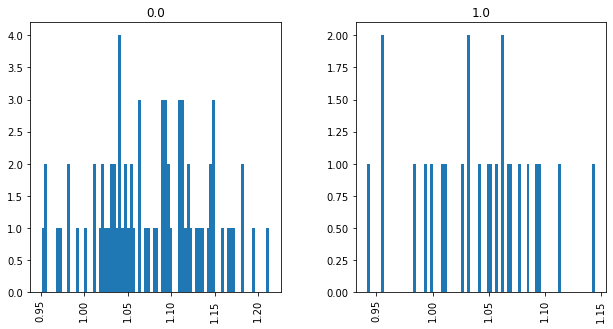

In [ ]:
filter_metrics.hist(by='Linked?',column=DistanceMetric.WMD,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47edc58b00>,
      dtype=object)

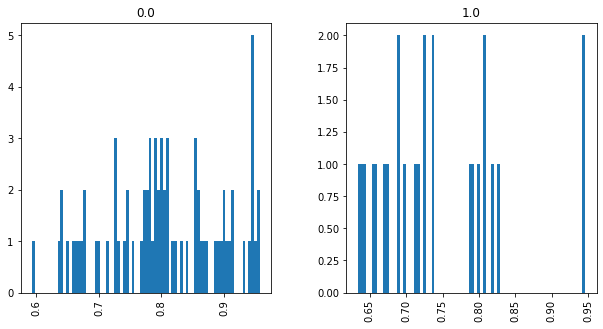

In [ ]:
filter_metrics.hist(by='Linked?',column=DistanceMetric.SCM,figsize=[10, 5],bins=80)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

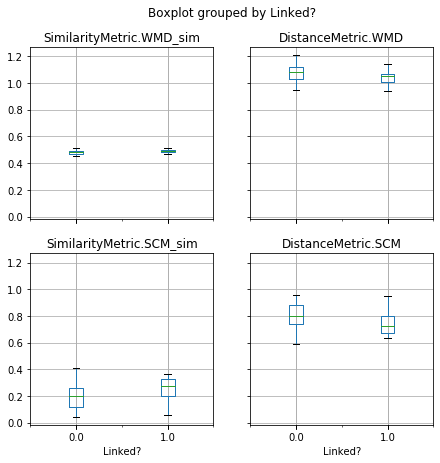

In [ ]:
boxplot = filter_metrics.boxplot(by='Linked?',column=[SimilarityMetric.WMD_sim,DistanceMetric.WMD,SimilarityMetric.SCM_sim,
                            DistanceMetric.SCM],figsize=[7, 7])

## Entropy Plots

In [ ]:
filter_metrics_01 = filter_metrics.copy()
filter_metrics_01.dropna(inplace=True)

In [ ]:
filter_metrics_01[EntropyMetric.MSI_I]

0     4.685972
1     3.653757
2     2.873141
3     4.367133
4     3.520787
        ...   
95    4.401750
96    4.682616
97    3.272813
98    4.068451
99    2.842371
Name: EntropyMetric.MSI_I, Length: 100, dtype: float64

In [ ]:
def compute_spearman_corr(filter_metrics_01, columns = [EntropyMetric.MSI_I,SimilarityMetric.SCM_sim] ):
    df_correlation = filter_metrics_01.copy() 
    correlation = df_correlation[columns].corr(method='spearman')
    #correlation = df_correlation.corr(method='spearman')
    return correlation[columns[0]].values[1]

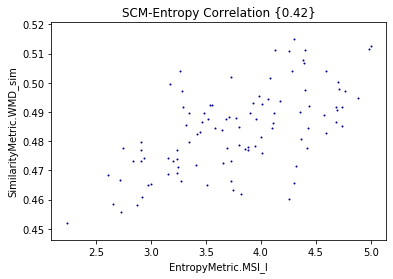

In [ ]:
# Minimum Shared Entropy and Word Distance
x1 = filter_metrics_01.plot.scatter(
    x=EntropyMetric.MSI_I,
    y=SimilarityMetric.WMD_sim, 
    c='DarkBlue', 
    s=1,
    title = 'SCM-Entropy Correlation {%.2f}' % compute_spearman_corr(filter_metrics_01)
)

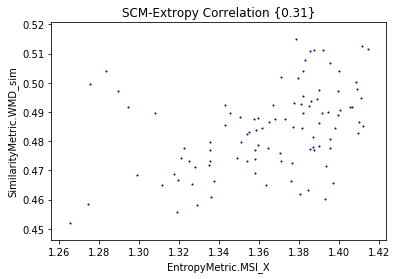

In [ ]:
x1 = filter_metrics_01.plot.scatter(
    x=EntropyMetric.MSI_X,
    y=SimilarityMetric.WMD_sim, 
    c='DarkBlue', 
    s=1,
    title = 'SCM-Extropy Correlation {%.2f}' % compute_spearman_corr(filter_metrics_01,[EntropyMetric.MSI_X,SimilarityMetric.SCM_sim] )
)

In [ ]:
filter_metrics_linked = filter_metrics_01[filter_metrics_01['Linked?'] == 1].copy()
filter_metrics_nonlinked = filter_metrics_01[filter_metrics_01['Linked?'] == 0].copy()


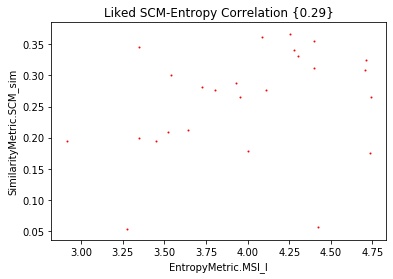

In [ ]:
x2 = filter_metrics_01[filter_metrics_01['Linked?'] == 1].plot.scatter(
    x=EntropyMetric.MSI_I,
    y=SimilarityMetric.SCM_sim, 
    c='Red',
    s=1,
    title = 'Liked SCM-Entropy Correlation {%.2f}' % compute_spearman_corr(filter_metrics_linked)
)
#x2.text(0,0,'test')

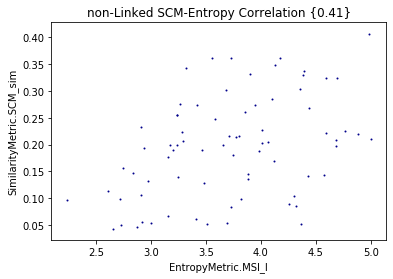

In [ ]:
x2_ = filter_metrics_nonlinked.plot.scatter(
    x=EntropyMetric.MSI_I,
    y=SimilarityMetric.SCM_sim, 
    c='DarkBlue',
    s=1,
    title = 'non-Linked SCM-Entropy Correlation {%.2f}' % compute_spearman_corr(filter_metrics_nonlinked)
)

Text(0, 0.5, 'Minimum Shared Extropy')

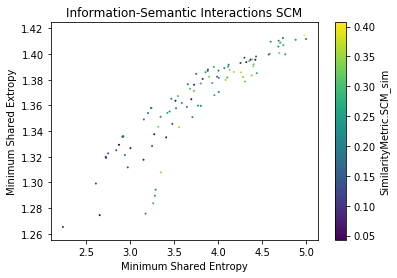

In [ ]:
#Information levels vs semantics
fig, ax = plt.subplots()
filter_metrics_01.plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.SCM_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions SCM',
    colormap = 'viridis',
    ax = ax,
    s=1
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

Text(0, 0.5, 'Minimum Shared Extropy')

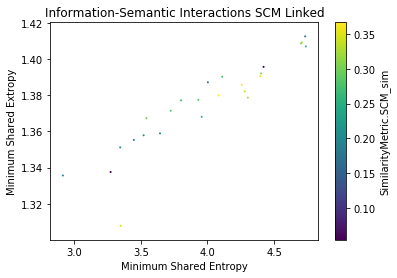

In [ ]:
#Separated by ground truth Links!
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 1].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.SCM_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions SCM Linked',
    colormap = 'viridis',
    ax = ax,
    s=1
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

Text(0, 0.5, 'Minimum Shared Extropy')

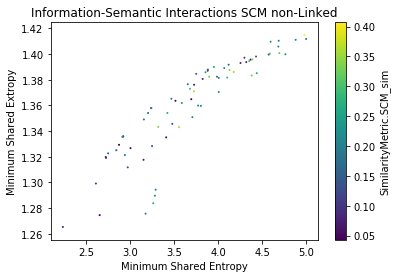

In [ ]:
#Separated by ground truth NonLinked!
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 0].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.SCM_sim,
    #figsize = [6, 5],
    title = 'Information-Semantic Interactions SCM non-Linked',
    colormap = 'viridis',
    ax = ax,
    s=1
)

ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

Text(0, 0.5, 'Minimum Shared Entropy')

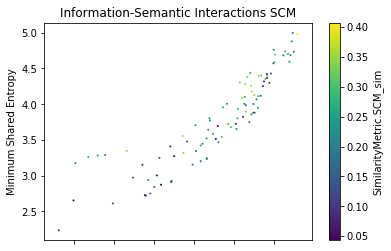

In [ ]:
ax7 = filter_metrics_01.plot.scatter(
    x = EntropyMetric.MSI_X,
    y = EntropyMetric.MSI_I,
    c = SimilarityMetric.SCM_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions SCM',
    colormap = 'viridis',
    s=1
)
ax7.set_xlabel("Minimum Shared Extropy")
ax7.set_ylabel("Minimum Shared Entropy")

Text(0, 0.5, 'Minimum Shared Extropy')

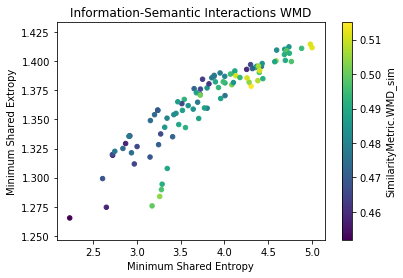

In [ ]:
fig, ax = plt.subplots()
filter_metrics_01.plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.WMD_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions WMD',
    colormap = 'viridis',
    ax = ax
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

Text(0, 0.5, 'Minimum Shared Extropy')

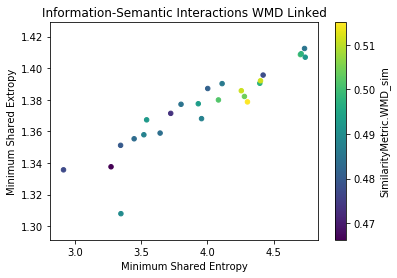

In [ ]:
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 1].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.WMD_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions WMD Linked',
    colormap = 'viridis',
    ax = ax
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

Text(0, 0.5, 'Minimum Shared Extropy')

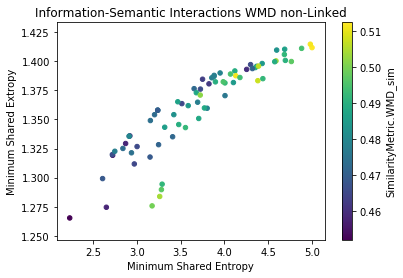

In [ ]:
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 0].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.WMD_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions WMD non-Linked',
    colormap = 'viridis',
    ax = ax
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

In [ ]:
filter_metrics.head()

# Artifacts Similarity with Doc2Vec

Try to reproduce the same empirical evaluation like here: [link](https://arxiv.org/pdf/1507.07998.pdf). Pay attention to:
- Accuracy vs. Dimensionality (we can replace accuracy for false positive rate or true positive rate)
- Visualize paragraph vectors using t-sne
- Computing Cosine Distance and Similarity. More about similarity [link](https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html)

In [ ]:
#path_to_trained_model": 'test_data/models/pv/conv/[doc2vec-Py-Java-PVDBOW-500-20E-1592609630.689167].model',
#"path_to_trained_model": 'test_data/models/pv/conv/[doc2vec-Py-Java-Wiki-PVDBOW-500-20E[15]-1592941134.367976].model',
path_to_trained_model = 'test_data/models/[doc2vec-Py-Java-PVDBOW-500-20E-8k-1594572857.17191].model'

In [ ]:
def doc2vec_params():
    return {
        "vectorizationType": VectorizationType.doc2vec,
        "linkType": LinkType.req2tc,
        "system": 'libest',
        "path_to_trained_model": path_to_trained_model,
        "source_path": '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-req].csv',
        "target_path": '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-tc].csv',
        "system_path": '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-all].csv',
        "saving_path": 'test_data/',
        "names": ['Source','Target','Linked?']
    }

In [ ]:
doc2vec_params = doc2vec_params()
doc2vec_params

In [ ]:
#Export
class Doc2VecSeqVect(BasicSequenceVectorization):
    
    def __init__(self, params):
        super().__init__(params)
        self.new_model = gensim.models.Doc2Vec.load( params['path_to_trained_model'] )
        self.new_model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
        self.df_inferred_src = None
        self.df_inferred_trg = None
        
        self.dict_distance_dispatcher = {
            DistanceMetric.COS: self.cos_scipy,
            SimilarityMetric.Pearson: self.pearson_abs_scipy,
            DistanceMetric.EUC: self.euclidean_scipy,
            DistanceMetric.MAN: self.manhattan_scipy
        }
    
    def distance(self, metric_list, link):
        '''Iterate on the metrics'''
        ν_inferredSource = list(self.df_inferred_src[self.df_inferred_src['ids'].str.contains(link[0])]['inf-doc2vec'])
        w_inferredTarget = list(self.df_inferred_trg[self.df_inferred_trg['ids'].str.contains(link[1])]['inf-doc2vec'])
        
        dist = [ self.dict_distance_dispatcher[metric](ν_inferredSource,w_inferredTarget) for metric in metric_list]
        logging.info("Computed distances or similarities "+ str(link) + str(dist))    
        return functools.reduce(lambda a,b : a+b, dist) #Always return a list
    
    def computeDistanceMetric(self, links, metric_list):
        '''It is computed the cosine similarity'''
        
        metric_labels = [ self.dict_labels[metric] for metric in metric_list] #tracking of the labels
        distSim = [[link[0], link[1], self.distance( metric_list, link )] for link in links] #Return the link with metrics
        distSim = [[elem[0], elem[1]] + elem[2] for elem in distSim] #Return the link with metrics
        
        return distSim, functools.reduce(lambda a,b : a+b, metric_labels)

    
    def InferDoc2Vec(self, steps=200):
        '''Activate Inference on Target and Source Corpus'''
        self.df_inferred_src = self.df_source.copy()
        self.df_inferred_trg = self.df_target.copy()
        
        self.df_inferred_src['inf-doc2vec'] =  [self.new_model.infer_vector(artifact.split(),steps=steps) for artifact in self.df_inferred_src['text'].values]
        self.df_inferred_trg['inf-doc2vec'] =  [self.new_model.infer_vector(artifact.split(),steps=steps) for artifact in self.df_inferred_trg['text'].values]
        
        logging.info("Infer Doc2Vec on Source and Target Complete")
    

### Testing Doc2Vec SequenceVectorization

In [ ]:
doc2vec = Doc2VecSeqVect(params = doc2vec_params)

In [ ]:
#[step1]Apply Doc2Vec Inference
doc2vec.InferDoc2Vec(steps=200)

In [ ]:
doc2vec.df_inferred_src.head(2)

In [ ]:
#test_inferDoc2Vec_trg = inferDoc2Vec(df_target)
#test_inferDoc2Vec_trg.head()
doc2vec.df_inferred_trg.head(2)

In [ ]:
pearsonr(doc2vec.df_inferred_trg['inf-doc2vec'][0], doc2vec.df_inferred_trg['inf-doc2vec'][0])

In [ ]:
#[step 2]NonGroundTruth Computation
metric_l = [DistanceMetric.EUC,DistanceMetric.COS,DistanceMetric.MAN]# , SimilarityMetric.Pearson]
doc2vec.ComputeDistanceArtifacts( sampling=False, samples = 50, metric_list = metric_l )
doc2vec.df_nonground_link.head()

In [ ]:
#[step 3]Saving Non-GroundTruth Links
doc2vec.SaveLinks()

In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_nonglinks_doc2vec = LoadLinks(timestamp=1594653325.258415, params=doc2vec_params)
df_nonglinks_doc2vec.head()

In [ ]:
#[step 4]GroundTruthMatching Testing
path_to_ground_truth = '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt'
doc2vec.MatchWithGroundTruth(path_to_ground_truth)
doc2vec.df_ground_link

In [ ]:
#[step 5]Saving GroundTruth Links
doc2vec.SaveLinks(grtruth = True)

In [ ]:
#Loading Non-GroundTruth Links (change the timestamp with the assigned in the previous step)
df_glinks_doc2vec = LoadLinks(timestamp=1594653350.19946, params=doc2vec_params, grtruth = True)
df_glinks_doc2vec.head()

# Approach Evaluation and Interpretation (doc2vec)

In [ ]:
#supervisedEvalDoc2vec = SupervisedVectorEvaluation(doc2vec, similarity=SimilarityMetric.EUC_sim)
#supervisedEvalDoc2vec = SupervisedVectorEvaluation(doc2vec, similarity=SimilarityMetric.COS_sim)
supervisedEvalDoc2vec = SupervisedVectorEvaluation(doc2vec, similarity=SimilarityMetric.MAN_sim)

In [ ]:
supervisedEvalDoc2vec.y_test

In [ ]:
supervisedEvalDoc2vec.y_score

In [ ]:
supervisedEvalDoc2vec.Compute_precision_recall_gain()

In [ ]:
supervisedEvalDoc2vec.Compute_avg_precision()

In [ ]:
supervisedEvalDoc2vec.Compute_roc_curve()

## Compute distribution of similarities doc2vec

In [ ]:
#Basic Statistics
filter_doc2vec = doc2vec.df_ground_link
filter_doc2vec.describe()

In [ ]:
lag_plot(filter_doc2vec[[SimilarityMetric.EUC_sim]])

In [ ]:
lag_plot(filter_doc2vec[DistanceMetric.EUC])

In [ ]:
filter_doc2vec.hist(column=[SimilarityMetric.EUC_sim,DistanceMetric.EUC],color='k',bins=50,figsize=[10,5],alpha=0.5)

In [ ]:
#Separate distance from similarity analysis here
errors = filter_doc2vec[[SimilarityMetric.EUC_sim,DistanceMetric.EUC]].std()
print(errors)
filter_doc2vec[[SimilarityMetric.EUC_sim,DistanceMetric.EUC]].plot.kde()

In [ ]:
filter_doc2vec.hist(by='Linked?',column=SimilarityMetric.EUC_sim,figsize=[10, 5],bins=80)

In [ ]:
filter_doc2vec.hist(by='Linked?',column=DistanceMetric.EUC,figsize=[10, 5],bins=80)

In [ ]:
#separate the distance from the similarity plot
boxplot = filter_doc2vec.boxplot(by='Linked?',column=[SimilarityMetric.EUC_sim,DistanceMetric.EUC],figsize=[10, 5])

In [ ]:
boxplot = filter_doc2vec.boxplot(by='Linked?',column=[SimilarityMetric.EUC_sim],figsize=[10, 5])

## Combining Doc2vec and Word2vec
Please check this post for futher detatils [link](https://stats.stackexchange.com/questions/217614/intepreting-doc2vec-cosine-similarity-between-doc-vectors-and-word-vectors)

In [ ]:
! nbdev_build_docs #<-------- [Activate when stable]

In [ ]:
! nbdev_build_lib

In [ ]:
from nbdev.export import notebook2script
notebook2script()

In [ ]:
#! pip install -e .